# 03 Lane Filter and Car Commands
###      03-1 Line Detection
###      03-2 Lane Filter

## 03-1 Line Detection
### Import Packages and Load the image and resize

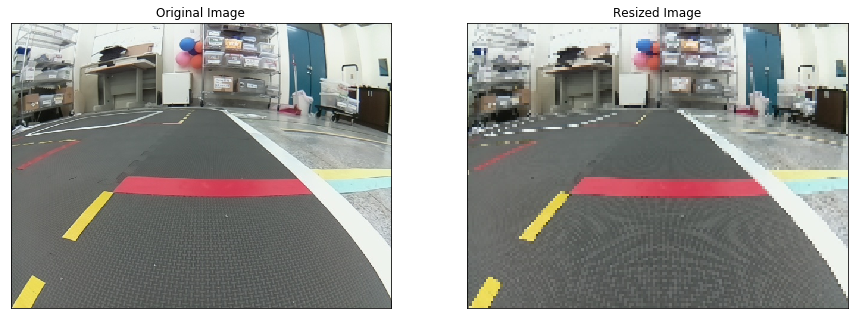

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 15)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels

#Use your own image
img = cv2.imread("images/road.jpg")

image_cv = cv2.resize(img, (160, 120),interpolation=cv2.INTER_NEAREST)

dst1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(dst1,cmap = 'brg')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

dst2 = cv2.cvtColor(image_cv,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst2,cmap = 'brg')
plt.title('Resized Image'), plt.xticks([]), plt.yticks([])

plt.show()


### Find the Edges

You should find the config file 'universal.yaml'

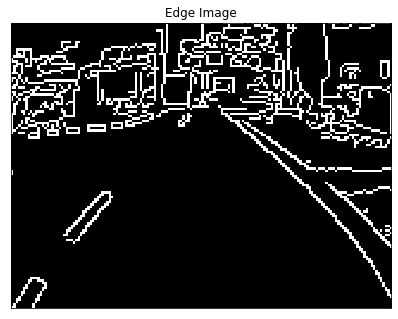

In [2]:
gray = cv2.cvtColor(image_cv,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(gray,100,350)
plt.subplot(121), plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Setup HSV Space Threshold

You should find the config file 'universal.yaml'

In [3]:
hsv_white1 = np.array([0,0,150])
hsv_white2 = np.array([180,100,255])
hsv_yellow1 = np.array([25,50,50])
hsv_yellow2 = np.array([45,255,255])
hsv_red1 = np.array([0,100,100])
hsv_red2 = np.array([15,255,255])
hsv_red3 = np.array([165,100,100])
hsv_red4 = np.array([180,255,255])

### Threshold colors in HSV space

/home/johnlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/johnlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


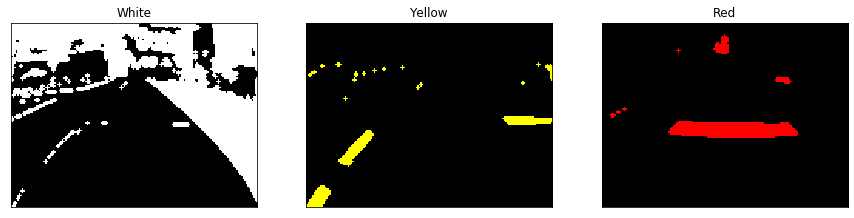

In [4]:
hsv = cv2.cvtColor(image_cv,cv2.COLOR_BGR2HSV)
white = cv2.inRange(hsv,hsv_white1,hsv_white2)
yellow = cv2.inRange(hsv,hsv_yellow1,hsv_yellow2)
red1 = cv2.inRange(hsv,hsv_red1,hsv_red2)
red2 = cv2.inRange(hsv,hsv_red3,hsv_red4)
red = cv2.bitwise_or(red1,red2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3, 3))
white = cv2.dilate(white, kernel)
yellow = cv2.dilate(yellow, kernel)
red = cv2.dilate(red, kernel)
# Uncomment '#' to plot with color
x = cv2.cvtColor(yellow, cv2.COLOR_GRAY2BGR)
x[:,:,2] *= 1
x[:,:,1] *= 1
x[:,:,0] *= 0
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

y = cv2.cvtColor(red, cv2.COLOR_GRAY2BGR)
y[:,:,2] *= 1
y[:,:,1] *= 0
y[:,:,0] *= 0
y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)

plt.subplot(131),plt.imshow(white,cmap = 'gray')
plt.title('White'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(yellow,cmap = 'gray')
plt.subplot(132),plt.imshow(x,cmap = 'brg')
plt.title('Yellow'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(red,cmap = 'gray')
plt.subplot(133),plt.imshow(y,cmap = 'brg')
plt.title('Red'), plt.xticks([]), plt.yticks([])

plt.show()

### Combine Edge and Colors

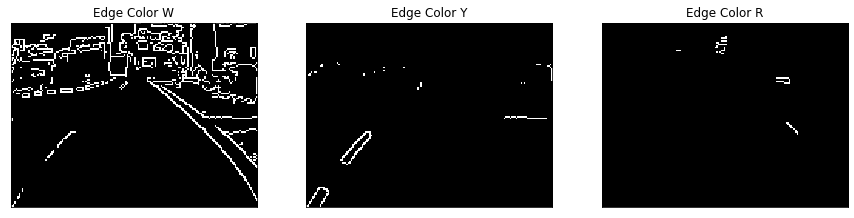

In [5]:
edge_color_white=cv2.bitwise_and(edges,white)
edge_color_yellow=cv2.bitwise_and(edges,yellow)
edge_color_red=cv2.bitwise_and(edges,red)

plt.imshow(edge_color_yellow,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
plt.subplot(131),plt.imshow(edge_color_white,cmap = 'gray')
plt.title('Edge Color W'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edge_color_yellow,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edge_color_red,cmap = 'gray')
plt.title('Edge Color R'), plt.xticks([]), plt.yticks([])

plt.show()

### Find the lines

In [8]:
lines_white = cv2.HoughLinesP(edge_color_white,1,np.pi/180,10,np.empty(1),1.5,1)
lines_yellow = cv2.HoughLinesP(edge_color_yellow,1,np.pi/180,10,np.empty(1),1.5,1)
lines_red = cv2.HoughLinesP(edge_color_red,1,np.pi/180,10,np.empty(1),1.5,1)

color = "y"
lines = lines_yellow
bw = yellow

#color = "y"
#lines = lines_white
#bw = white

if lines is not None:
    #lines = np.array(lines[0])
    lines = lines[:, 0, :]
    print (lines)
    print ("found lines")

else:
    lines = []
    print ("no lines")

[[  2 116   9 107]
 [ 22  89  30  81]
 [129  61 142  61]
 [ 31  85  42  73]
 [ 23  87  39  71]
 [143  62 155  62]
 [  9 119  12 114]
 [ 26  92  31  87]
 [ 72  43  74  41]
 [ 32  85  34  83]
 [ 36  79  40  75]]
found lines


### Show the lines (yellow)

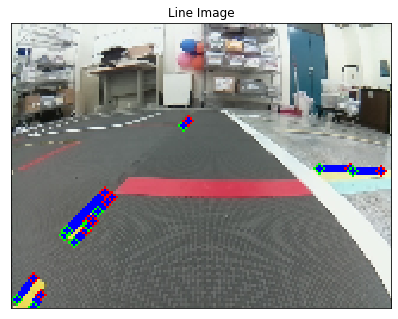

In [9]:
image_with_lines = np.copy(dst2)
if len(image_with_lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.subplot(121), plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Find normals

In [10]:
arr_cutoff = np.array((0, 40, 0, 40))
arr_ratio = np.array((1./160, 1./120, 1./160, 1./120))
        
normals = []
centers = []
if len(lines)>0:
    
    #find the normalized coordinates
    lines_normalized = ((lines + arr_cutoff) * arr_ratio)
    length = np.sum((lines[:,0:2]-lines[:,2:4])**2,axis=1,keepdims=True)**0.5
    dx = 1.*(lines[:,3:4]-lines[:,1:2])/length
    dy = 1.*(lines[:,0:1]-lines[:,2:3])/length
    centers = np.hstack([(lines[:,0:1]+lines[:,2:3])/2,(lines[:,1:2]+lines[:,3:4])/2])
    #find the vectors' direction
    x3 = (centers[:,0:1] - 3.*dx).astype('int')
    x3[x3<0]=0
    x3[x3>=160]=160-1

    y3 = (centers[:,1:2] - 3.*dy).astype('int')
    y3[y3<0]=0
    y3[y3>=120]=120-1

    x4 = (centers[:,0:1] + 3.*dx).astype('int')
    x4[x4<0]=0
    x4[x4>=160]=160-1
    
    y4 = (centers[:,1:2] + 3.*dy).astype('int')
    y4[y4<0]=0
    y4[y4>=120]=120-1
    
    flag_signs = (np.logical_and(bw[y3,x3]>0,bw[y4,x4]==0)).astype('int')*2-1
    normals = np.hstack([dx, dy]) * flag_signs
    flag = ((lines[:,2]-lines[:,0])*normals[:,1] - (lines[:,3]-lines[:,1])*normals[:,0])>0
    for i in range(len(lines)):
        if flag[i]:
            x1,y1,x2,y2 = lines[i, :]
            lines[i, :] = [x2,y2,x1,y1]

### Draw the normals 

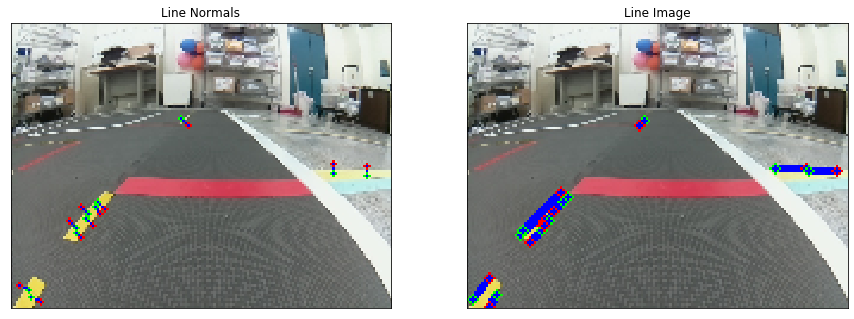

In [11]:
image_with_lines = np.copy(dst2)
if len(centers)>0:
    for x,y,dx,dy in np.hstack((centers,normals)):
        x3 = int(x - 2.*dx)
        y3 = int(y - 2.*dy)
        x4 = int(x + 2.*dx)
        y4 = int(y + 2.*dy)
        cv2.line(image_with_lines, (x3,y3), (x4,y4), (0,0,255), 1)
        cv2.circle(image_with_lines, (x3,y3), 1, (0,255,0))
        cv2.circle(image_with_lines, (x4,y4), 1, (255,0,0))
            
plt.subplot(121),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Normals'), plt.xticks([]), plt.yticks([])

image_with_lines = np.copy(dst2)
if len(lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.subplot(122),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 03-2 Lane Filter

### Import packages

In [12]:
import numpy as np
from scipy.stats import multivariate_normal, entropy
from scipy.ndimage.filters import gaussian_filter
from math import floor, atan2, pi, cos, sin, sqrt
import time
from matplotlib import pyplot as plt

### Environment Setup

In [13]:
# constant
WHITE = 0
YELLOW = 1
RED = 2

lanewidth = 0.4
linewidth_white = 0.04
linewidth_yellow = 0.02


### Generate Vote from Line Segments

#### Setup a line segment
* left edge of white lane
* right edge of white lane
* left edge of yellow lane
* right edge of white lane

11
0.0125 1.3 0.05625 1.225


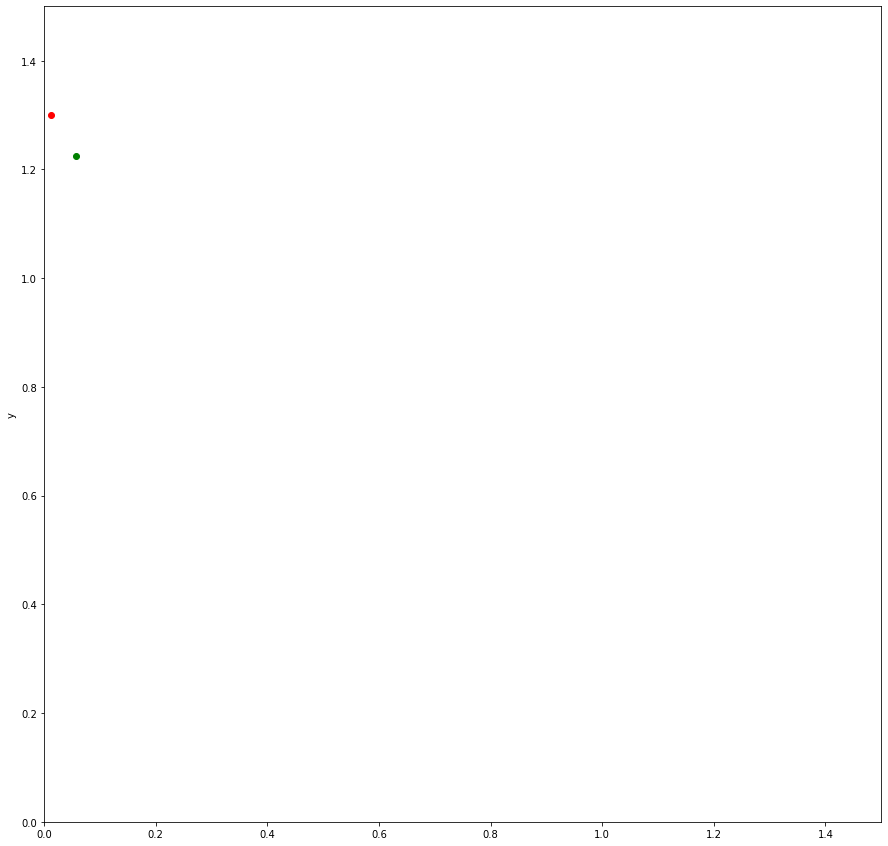

In [16]:

# right edge of yellow lane
print (len(lines_normalized))
p1 = np.array([lines_normalized[0][0],lines_normalized[0][1]])
p2 = np.array([lines_normalized[0][2],lines_normalized[0][3]])
#p1 = np.array([lines_normalized[2][0],lines_normalized[2][1]])
#p2 = np.array([lines_normalized[2][2],lines_normalized[2][3]])
seg_color = YELLOW
print (p1[0], p1[1], p2[0], p2[1])

# left edge of white lane
#p1 = np.array([0.4, 0.2])
#p2 = np.array([0.8, 0.2])
#seg_color = WHITE

plt.plot([p1[0]], [p1[1]], 'ro')
plt.plot([p2[0]], [p2[1]], 'go')
plt.ylabel('y')
plt.axis([0, 1.5, 0, 1.5])
plt.show()

#### compute d_i, phi_i, l_i

In [17]:
t_hat = (p2-p1)/np.linalg.norm(p2-p1)
n_hat = np.array([-t_hat[1],t_hat[0]])
d1 = np.inner(n_hat,p1)
d2 = np.inner(n_hat,p2)
l1 = np.inner(t_hat,p1)
l2 = np.inner(t_hat,p2)

# print (d1, d2, l1, l2)

if (l1 < 0):
    l1 = -l1;
if (l2 < 0):
    l2 = -l2;
l_i = (l1+l2)/2
d_i = (d1+d2)/2
phi_i = np.arcsin(t_hat[1])
if seg_color == WHITE: # right lane is white
    if(p1[0] > p2[0]): # right edge of white lane
        d_i = d_i - linewidth_white
        print ('right edge of white lane')
    else: # left edge of white lane
        d_i = - d_i
        phi_i = -phi_i
        print ('left edge of white lane')
    d_i = d_i - lanewidth/2

elif seg_color == YELLOW: # left lane is yellow
    if (p2[0] > p1[0]): # left edge of yellow lane
        d_i = d_i - linewidth_yellow
        phi_i = -phi_i
        print ('left edge of yellow lane')
    else: # right edge of yellow lane
        d_i = -d_i
        print ('right edge of yellow lane')
    d_i =  lanewidth/2 - d_i

    
print ("d_i: ", d_i)
print ("phi_i: ", phi_i)

left edge of yellow lane
d_i:  -0.44582956944254265
phi_i:  1.0427218783685368


### Measurement Likelihood

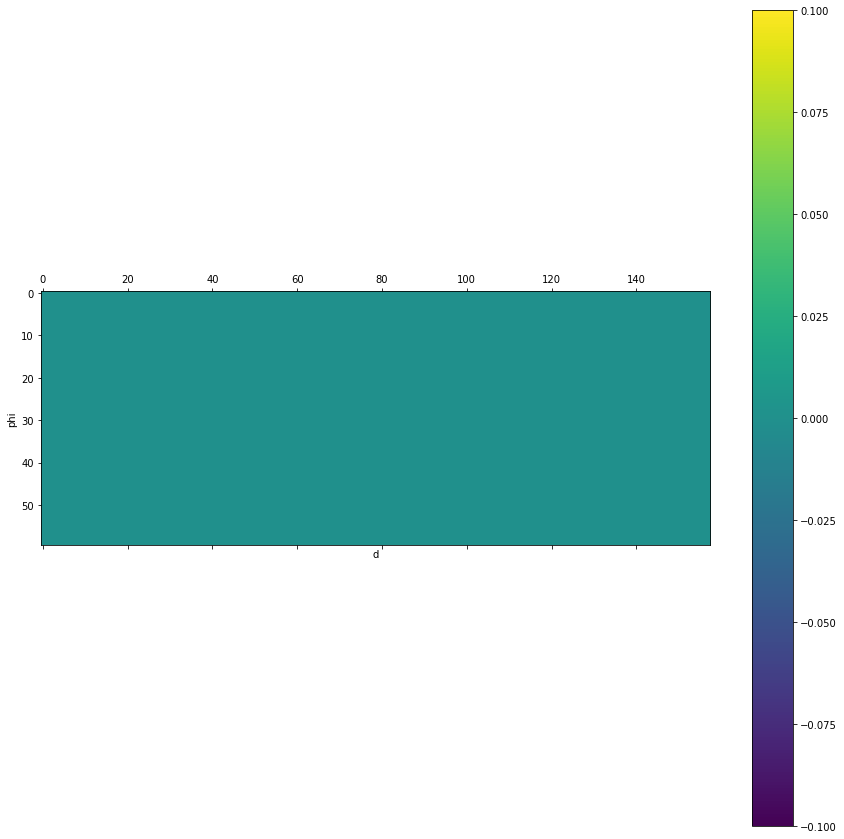

In [18]:
# initialize measurement likelihood

d_min = -0.7
d_max = 0.5
delta_d = 0.02
phi_min = -pi/2
phi_max = pi/2
delta_phi = 0.02
d, phi = np.mgrid[d_min:d_max:delta_d, phi_min:phi_max:delta_phi]

measurement_likelihood = np.zeros(d.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(measurement_likelihood, interpolation='nearest')
fig.colorbar(cax)
plt.ylabel('phi')
plt.xlabel('d')
#ax.set_xticklabels(['']+alpha)
#ax.set_yticklabels(['']+alpha)
plt.show()



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
12 130


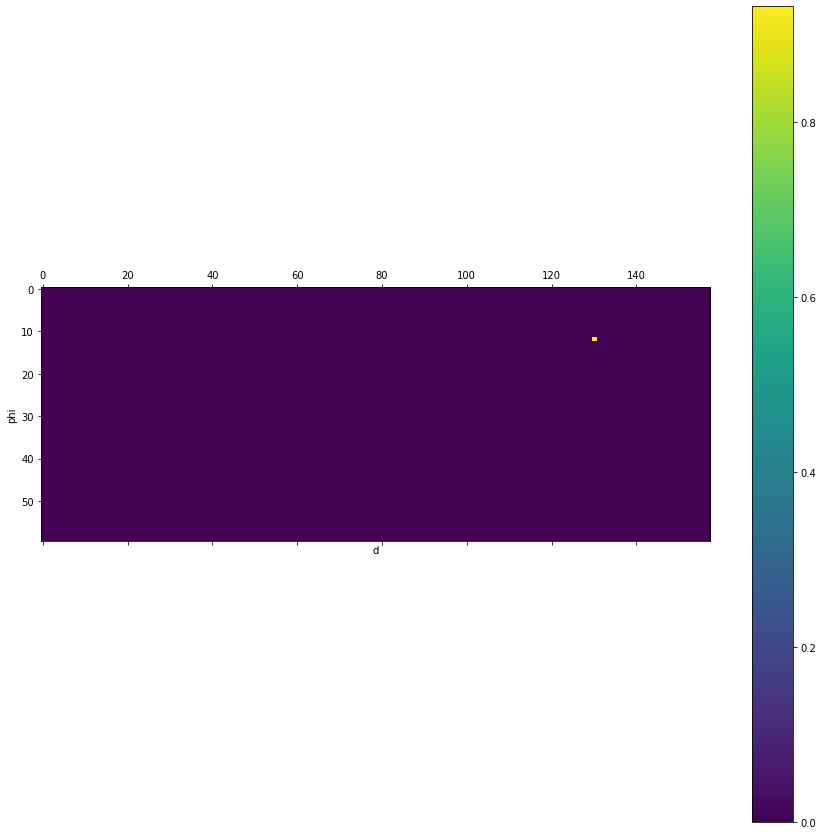

In [20]:
i = int(floor((d_i - d_min)/delta_d))
j = int(floor((phi_i - phi_min)/delta_phi))
print (measurement_likelihood[i:j])
measurement_likelihood[i,j] = measurement_likelihood[i,j] +  1/(l_i)

print (i, j)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(measurement_likelihood, interpolation='nearest')
fig.colorbar(cax)
plt.ylabel('phi')
plt.xlabel('d')
#ax.set_xticklabels(['']+alpha)
#ax.set_yticklabels(['']+alpha)
plt.show()